In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
img = cv2.imread('/content/gdrive/MyDrive/ComputerVisionSem6/indiagate1.jpg') 

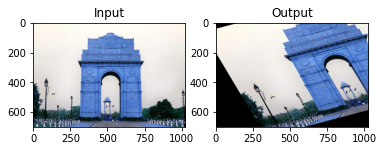

In [2]:
#affline transformation
rows, cols, ch = img.shape

pts1 = np.float32([[50, 50],
				          [200, 50],
				          [50, 200]])

pts2 = np.float32([[10, 100],
				          [200, 50],
				          [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

plt.show()

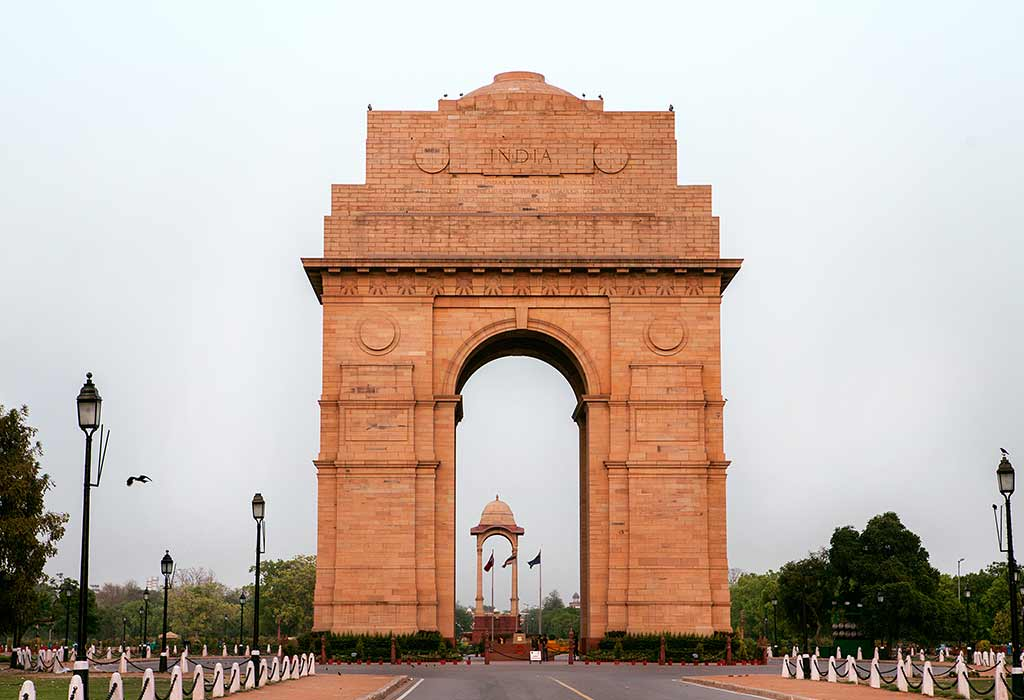

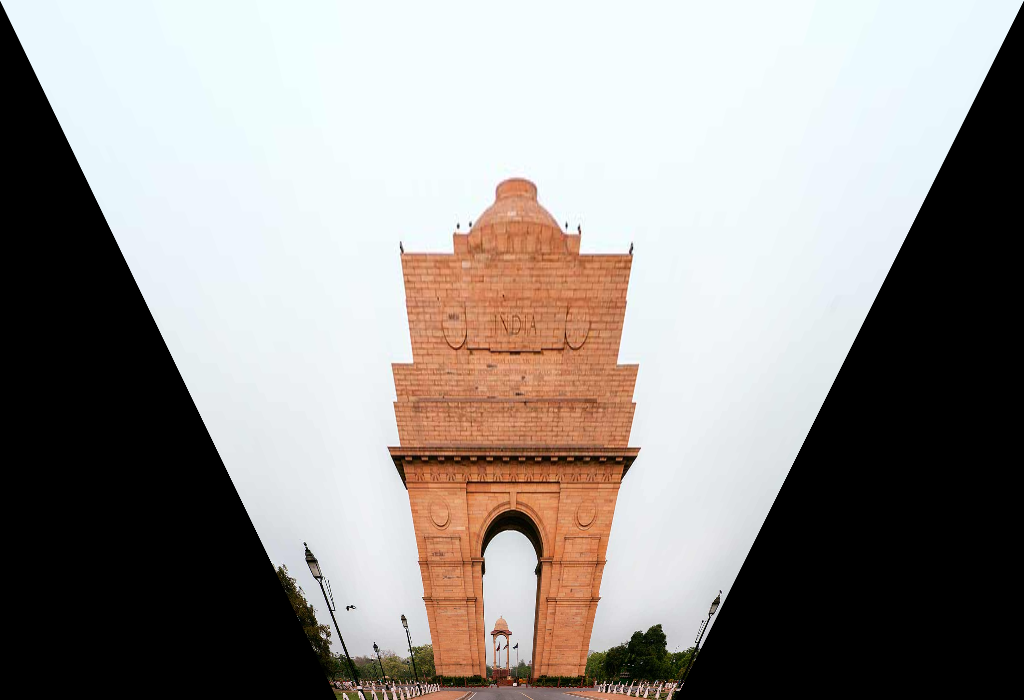

-1

In [8]:
#projective transformation
rows, cols = img.shape[:2]

src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1], [int(0.66*cols),rows-1]]) 
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))

cv2_imshow(img)
cv2_imshow(img_output)
cv2.waitKey()

[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  1.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


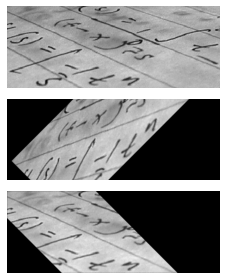

In [7]:
#similarity transformation
import math
from skimage import data
from skimage import transform

tform = transform.SimilarityTransform(scale=1, rotation=math.pi/2,
                                      translation=(0, 1))
print(tform.params)

text = data.text()

tform = transform.SimilarityTransform(scale=1, rotation=math.pi/4,
                                      translation=(text.shape[0]/2, -100))

rotated = transform.warp(text, tform)
back_rotated = transform.warp(rotated, tform.inverse)

fig, ax = plt.subplots(nrows=3)

ax[0].imshow(text, cmap=plt.cm.gray)
ax[1].imshow(rotated, cmap=plt.cm.gray)
ax[2].imshow(back_rotated, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()